In [2]:
#used to visualise coco-style annotations on images to verify correctness 

import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
json_file = "data_openlane/annotations/openlane_keypoints_sample_10training.json"
image_dir = "/work/scitas-share/datasets/Vita/civil-459/OpenLane/raw/images/training/"
color = (0, 255, 0)  # green
with open(json_file, 'r') as f:
    val_data = json.load(f)

In [4]:
#built dictionary of image_id (key) and image file path (value)
file_dict = dict()
for image_dict in val_data["images"]:
    file_dict[image_dict["id"]] = image_dict["file_name"]

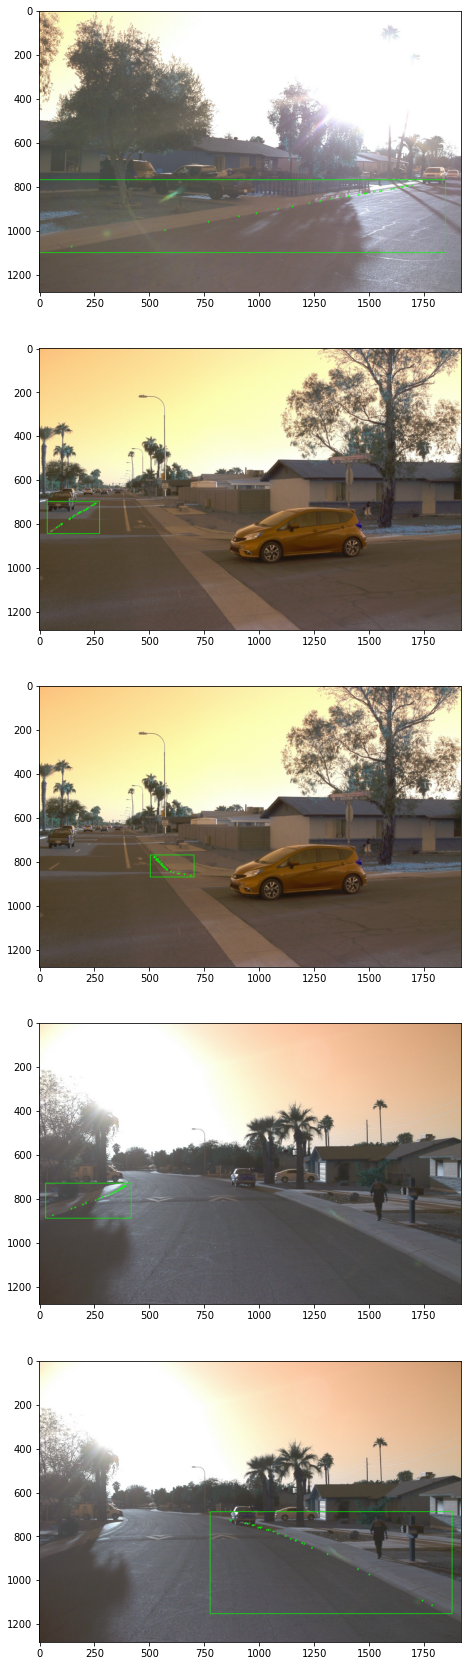

In [8]:
fig, axs = plt.subplots(5, 1, figsize=(30, 30))

for i, ann_dict in enumerate(val_data["annotations"][:5]):
    image_file = file_dict[ann_dict["image_id"]]
    image = cv2.imread(image_file)
   
    image_name = str(ann_dict["image_id"]).zfill(12) + ".jpg"
    annotation_id = str(ann_dict["id"])

    kps = np.round(np.array(ann_dict["keypoints"])).astype(int)
    x = kps[0::3]
    y = kps[1::3]
    x0 = ann_dict["bbox"][0]
    y0 = ann_dict["bbox"][1]
    w = ann_dict["bbox"][2]
    h = ann_dict["bbox"][3]
    x1 = x0 + w
    y1 = y0 + h
    for count, coordinates in enumerate(zip(x, y)):
        cv2.putText(image, str(count + 1), coordinates, cv2.FONT_HERSHEY_SIMPLEX, 0.25, color)
        cv2.drawMarker(image, coordinates, color=color, markerType=cv2.MARKER_CROSS, thickness=2,
                        markerSize=7)
        cv2.rectangle(image, (x0, y0), (x1, y1), color=color, thickness=2)
    
    axs[i].imshow(image)